In [23]:
import pandas as pd

In [24]:
df = pd.read_csv("StudentsPerformance.csv")

In [25]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


Basic EDA

In [26]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [28]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [29]:
print("Null Values:\n\n",df.isnull().sum())

Null Values:

 gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Writing Score Distribution')

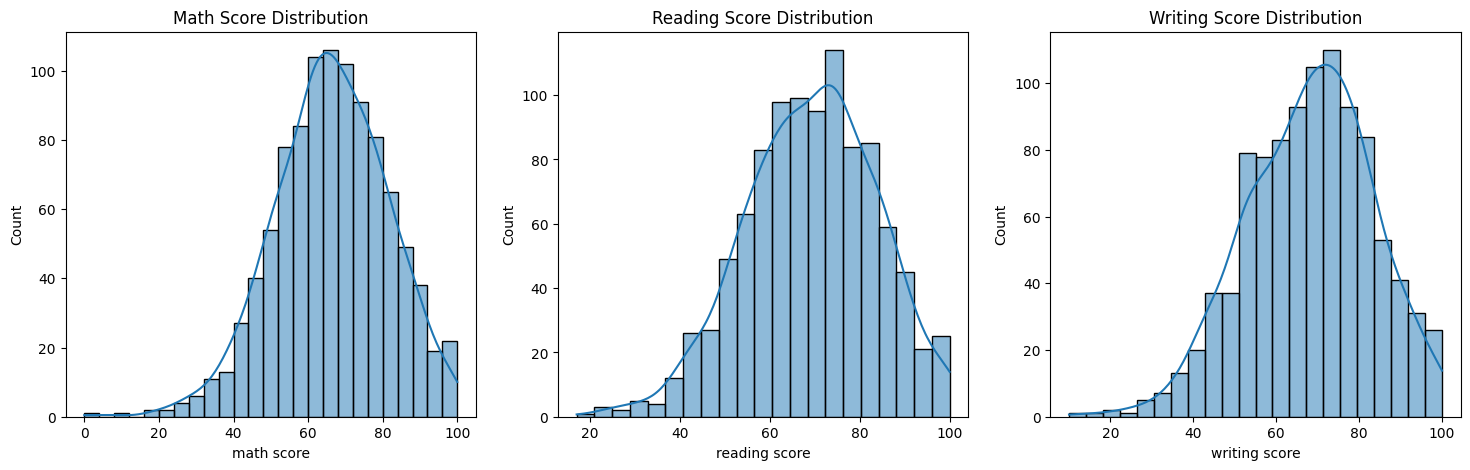

In [31]:
plt.figure(figsize=(18,5))
#math score
plt.subplot(1,3,1)
sns.histplot(df['math score'],kde=True)
plt.title("Math Score Distribution")
#reading score
plt.subplot(1,3,2)
sns.histplot(df['reading score'],kde=True)
plt.title("Reading Score Distribution")
#writing score
plt.subplot(1,3,3)
sns.histplot(df['writing score'],kde=True)
plt.title("Writing Score Distribution")

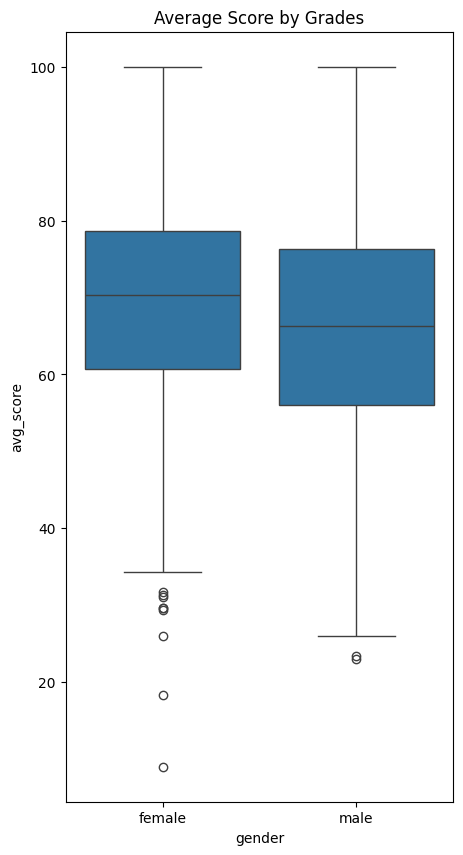

In [32]:
#Gender vs Average Scores
plt.figure(figsize=(5,10))
df['avg_score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)
sns.boxplot(x='gender',y='avg_score',data = df)
plt.title("Average Score by Grades")
plt.show()

In [33]:
correlation = df_enc.corr()
print(correlation)

                                               math score  ...  test preparation course_none
math score                                       1.000000  ...                     -0.177702
reading score                                    0.817580  ...                     -0.241780
writing score                                    0.802642  ...                     -0.312946
avg_score                                        0.918746  ...                     -0.256710
gender_male                                      0.167982  ...                     -0.006028
race/ethnicity_group B                          -0.084250  ...                      0.000106
race/ethnicity_group C                          -0.073387  ...                     -0.012522
race/ethnicity_group D                           0.050071  ...                      0.055956
race/ethnicity_group E                           0.205855  ...                     -0.059393
parental level of education_bachelor's degree    0.079664  ...        

<Axes: >

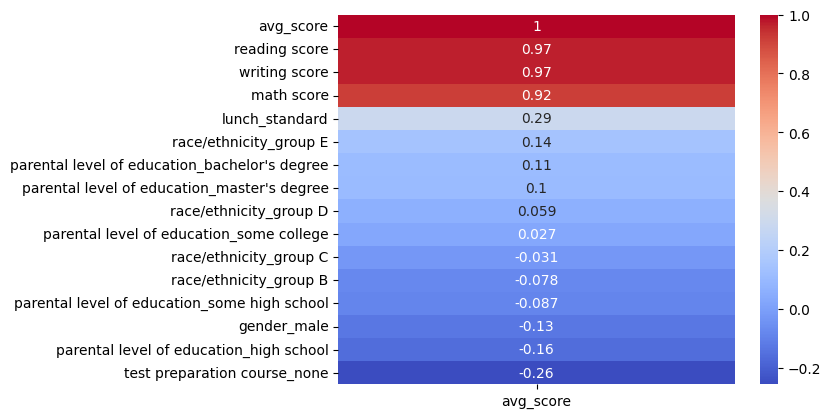

In [34]:
sns.heatmap(correlation[['avg_score']].sort_values(by='avg_score', ascending=False), annot=True, cmap='coolwarm')

Data Preprocessing

In [35]:
#check categorical columns
print(df.select_dtypes(include='object').columns)

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')


In [36]:
#one hot encoding the categorical features
df_enc = pd.get_dummies(df,drop_first=True)

In [37]:
#Define features
selected_features = [
    'lunch_standard',
    'test preparation course_none',
    'gender_male',
    "parental level of education_bachelor's degree",
    'race/ethnicity_group E'
]
X = df_enc[selected_features]
y = df_enc['avg_score']

In [38]:
#Train-test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

Modeling

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score

#train model
model = RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

In [40]:
#predict
y_pred = model.predict(X_test)

In [41]:
import numpy as np
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
print("Mean Squared Error: ", mse)
print("Root Mean Squared Error: ", rmse)
print("R2 Score: ",r2_score(y_test,y_pred))

Mean Squared Error:  201.7921318714576
Root Mean Squared Error:  14.20535574603669
R2 Score:  0.05865856318332485
